<a href="https://colab.research.google.com/github/ridhiaggarwal06/Twitter_sentiment_analysis/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import word_tokenize
from nltk import pos_tag
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df = pd.read_csv('twitter data_2021.csv')

In [ ]:
df.head()

,date,tweet,language,replies_count,retweets_count,likes_count,hashtags,retweet
0,01-04-2021,@KentsBrokerage Most people just look at the M...,en,0,0,0,[],FALSE
1,01-04-2021,@BrandoNoodles @MacroVoices @ErikSTownsend @Pa...,en,1,0,13,[],FALSE
2,01-04-2021,Government: All island curfew Also government...,en,0,0,0,['ends'],FALSE
3,01-04-2021,"FLoC engineer, categorizing websites to make s...",en,5,7,28,[],FALSE
4,01-04-2021,CPI Rose 0.4% in February on Higher Prices for...,en,0,0,0,[],FALSE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4244 non-null   object
 1   tweet           4244 non-null   object
 2   language        4244 non-null   object
 3   replies_count   4244 non-null   object
 4   retweets_count  4244 non-null   object
 5   likes_count     4244 non-null   object
 6   hashtags        4244 non-null   object
 7   retweet         4244 non-null   object
dtypes: object(8)
memory usage: 265.4+ KB


In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
df['tweet_processed'] = [tweet.lower() for tweet in df['tweet']]

In [ ]:
def unnecessary_words(tweet_processed):
  return re.sub(r'\b\w{1,2}\b', '',tweet_processed)
df['tweet_processed'] = df['tweet_processed'].apply(lambda x: unnecessary_words(x))
df['tweet_processed'].head()

0    @kentsbrokerage most people just look  the  an...
1    @brandonoodles @macrovoices @erikstownsend @pa...
2    government: all island curfew  also government...
3    floc engineer, categorizing websites  make sur...
4    cpi rose .%  february  higher prices for energ...
Name: tweet_processed, dtype: object

In [ ]:
def cleaning_repeating_char(tweet_processed):
  return re.sub(r'(.)1+', r'1', tweet_processed)
df['tweet_processed'] = df['tweet_processed'].apply(lambda x: cleaning_repeating_char(x))
df['tweet_processed'].head()

0    @kentsbrokerage most people just look  the  an...
1    @brandonoodles @macrovoices @erikstownsend @pa...
2    government: all island curfew  also government...
3    floc engineer, categorizing websites  make sur...
4    cpi rose .%  february  higher prices for energ...
Name: tweet_processed, dtype: object

In [ ]:
def cleaning_URLs(tweet_processed):
  return re.sub(r'http\S+', ' ', tweet_processed)
  #return re.sub('((www.[^s]+)|(https?://[^s]+))'," ",tweet_processed)
df['tweet_processed'] = df['tweet_processed'].apply(lambda x: cleaning_URLs(x))
df['tweet_processed'].head()

0    @kentsbrokerage most people just look  the  an...
1    @brandonoodles @macrovoices @erikstownsend @pa...
2    government: all island curfew  also government...
3    floc engineer, categorizing websites  make sur...
4    cpi rose .%  february  higher prices for energ...
Name: tweet_processed, dtype: object

In [ ]:
#removing HTML tags
def remove_html(tweet_processed):
  html=re.compile(r'<.*?>')
  return html.sub(r'', tweet_processed)
df['tweet_processed'] = df['tweet_processed'].apply(remove_html)

In [ ]:
def remove_com(tweet_processed):
  return re.sub(r"\ [A-Za-z]*\.com", " ", tweet_processed)
df['tweet_processed'] = df['tweet_processed'].apply(lambda x: remove_com(x))
df['tweet_processed'].head()

0    @kentsbrokerage most people just look  the  an...
1    @brandonoodles @macrovoices @erikstownsend @pa...
2    government: all island curfew  also government...
3    floc engineer, categorizing websites  make sur...
4    cpi rose .%  february  higher prices for energ...
Name: tweet_processed, dtype: object

In [ ]:
#cleaning and removing numeric numbers
def cleaning_numbers(tweet_processed):
  return re.sub('[0-9]+', '', tweet_processed)
df['tweet_processed'] = df['tweet_processed'].apply(lambda x: cleaning_numbers(x))
df['tweet_processed'].head()

0    @kentsbrokerage most people just look  the  an...
1    @brandonoodles @macrovoices @erikstownsend @pa...
2    government: all island curfew  also government...
3    floc engineer, categorizing websites  make sur...
4    cpi rose .%  february  higher prices for energ...
Name: tweet_processed, dtype: object

In [ ]:
def stripping_extra_spaces(tweet_processed):
  return re.sub(r' +', ' ', tweet_processed)
df['tweet_processed'] = df['tweet_processed'].apply(lambda x: stripping_extra_spaces(x))
df['tweet_processed'].head()

0    @kentsbrokerage most people just look the and ...
1    @brandonoodles @macrovoices @erikstownsend @pa...
2    government: all island curfew also government:...
3    floc engineer, categorizing websites make sure...
4    cpi rose .% february higher prices for energy ...
Name: tweet_processed, dtype: object

In [ ]:
add_words = ['â€˜', ' ðŸšš ðŸš', 'Visit','say','give','would','demo', 'center', 'Itâ€™s', 'â‡ï', 'ðŸŒŽ','scm', 's', 'get','take','help', 'read', 'more', 'new', 'one', 'supply','webinar','republic','latin']
stop_words.extend(add_words)

def cleaning_stopwords(tweet_processed):
  return " ".join([word for word in str(tweet_processed).split() if word not in stop_words])
df['tweet_processed'] = df['tweet_processed'].apply(lambda tweet_processed: cleaning_stopwords(tweet_processed))
df['tweet_processed'].head()

0    @kentsbrokerage people look naturally assume i...
1    @brandonoodles @macrovoices @erikstownsend @pa...
2    government: island curfew also government: gas...
3    floc engineer, categorizing websites make sure...
4    cpi rose .% february higher prices energy medi...
Name: tweet_processed, dtype: object

In [ ]:
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text
df['tweet_processed'] = df['tweet_processed'].apply(clean)
df['tweet_processed']

0        kentsbrokerage people look naturally assume i...
1        brandonoodles macrovoices erikstownsend patri...
2       government island curfew also government gas s...
3       floc engineer categorizing websites make sure ...
4       cpi rose february higher prices energy medical...
                              ...                        
4239    first day month month divides year two last mo...
4240     eyedeel volincel thousands miles forest shit ...
4241    thread providing drones proxies syria supply l...
4242             allbomdoubt may try work logistics this 
4243    imagine sky fishing like okay idea isn super f...
Name: tweet_processed, Length: 4244, dtype: object

In [ ]:
mydata = pd.DataFrame(df[['tweet','tweet_processed']])

In [ ]:
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}
def token_stop_pos(tweet_processed):
  tags = pos_tag(word_tokenize(tweet_processed))
  newlist = []
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      newlist.append(tuple([word, pos_dict.get(tag[0])]))
  return newlist
mydata['pos tagged'] = mydata['tweet_processed'].apply(token_stop_pos)
mydata.head()

,tweet,tweet_processed,pos tagged
0,@KentsBrokerage Most people just look at the M...,kentsbrokerage people look naturally assume i...,"[(kentsbrokerage, n), (people, n), (look, v), ..."
1,@BrandoNoodles @MacroVoices @ErikSTownsend @Pa...,brandonoodles macrovoices erikstownsend patri...,"[(brandonoodles, n), (macrovoices, n), (erikst..."
2,Government: All island curfew Also government...,government island curfew also government gas s...,"[(government, n), (island, n), (curfew, n), (a..."
3,"FLoC engineer, categorizing websites to make s...",floc engineer categorizing websites make sure ...,"[(floc, n), (engineer, n), (categorizing, v), ..."
4,CPI Rose 0.4% in February on Higher Prices for...,cpi rose february higher prices energy medical...,"[(cpi, n), (rose, v), (february, a), (higher, ..."


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemmatized_sent'] = mydata['pos tagged'].apply(lemmatize)
mydata.head()

,tweet,tweet_processed,pos tagged,Lemmatized_sent
0,@KentsBrokerage Most people just look at the M...,kentsbrokerage people look naturally assume i...,"[(kentsbrokerage, n), (people, n), (look, v), ...",kentsbrokerage people look naturally assume ...
1,@BrandoNoodles @MacroVoices @ErikSTownsend @Pa...,brandonoodles macrovoices erikstownsend patri...,"[(brandonoodles, n), (macrovoices, n), (erikst...",brandonoodles macrovoices erikstownsend patr...
2,Government: All island curfew Also government...,government island curfew also government gas s...,"[(government, n), (island, n), (curfew, n), (a...",government island curfew also government gas...
3,"FLoC engineer, categorizing websites to make s...",floc engineer categorizing websites make sure ...,"[(floc, n), (engineer, n), (categorizing, v), ...",floc engineer categorize website make sure s...
4,CPI Rose 0.4% in February on Higher Prices for...,cpi rose february higher prices energy medical...,"[(cpi, n), (rose, v), (february, a), (higher, ...",cpi rise february high price energy medical ...


In [ ]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(tweet_processed):
    return TextBlob(tweet_processed).sentiment.subjectivity

# function to calculate polarity
def getPolarity(tweet_processed):
    return TextBlob(tweet_processed).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score <= 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
mydata['Polarity'] = mydata['Lemmatized_sent'].apply(getPolarity)
mydata['Analysis'] = mydata['Polarity'].apply(analysis)
mydata.head()

,tweet,tweet_processed,pos tagged,Lemmatized_sent,Polarity,Analysis
0,@KentsBrokerage Most people just look at the M...,kentsbrokerage people look naturally assume i...,"[(kentsbrokerage, n), (people, n), (look, v), ...",kentsbrokerage people look naturally assume ...,0.020000,Positive
1,@BrandoNoodles @MacroVoices @ErikSTownsend @Pa...,brandonoodles macrovoices erikstownsend patri...,"[(brandonoodles, n), (macrovoices, n), (erikst...",brandonoodles macrovoices erikstownsend patr...,0.000000,Negative
2,Government: All island curfew Also government...,government island curfew also government gas s...,"[(government, n), (island, n), (curfew, n), (a...",government island curfew also government gas...,0.000000,Negative
3,"FLoC engineer, categorizing websites to make s...",floc engineer categorizing websites make sure ...,"[(floc, n), (engineer, n), (categorizing, v), ...",floc engineer categorize website make sure s...,0.346667,Positive
4,CPI Rose 0.4% in February on Higher Prices for...,cpi rose february higher prices energy medical...,"[(cpi, n), (rose, v), (february, a), (higher, ...",cpi rise february high price energy medical ...,0.080000,Positive


In [ ]:
tb_counts = mydata.Analysis.value_counts()
tb_counts

Negative    2315
Positive    1929
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f35ac9c8890>,
 [Text(-0.1566195710954385, 1.0887930519386506, 'Negative'),
  Text(0.15661957109543834, -1.0887930519386506, 'Positive')],
 [Text(-0.08542885696114826, 0.5938871192392638, '54.5%'),
  Text(0.08542885696114817, -0.5938871192392638, '45.5%')])

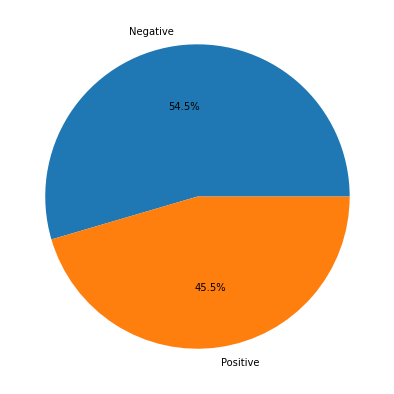

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= mydata.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, autopct='%1.1f%%', shadow=False)
# plt.legend()

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.0 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(tweet_processed):
    vs = analyzer.polarity_scores(tweet_processed)
    return vs['compound']
mydata['Vader Sentiment'] = mydata['Lemmatized_sent'].apply(vadersentimentanalysis)

In [ ]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
mydata['Vader_Analysis'] = mydata['Vader Sentiment'].apply(vader_analysis)
mydata.head()

,tweet,tweet_processed,pos tagged,Lemmatized_sent,Polarity,Analysis,Vader Sentiment,Vader_Analysis
0,@KentsBrokerage Most people just look at the M...,kentsbrokerage people look naturally assume i...,"[(kentsbrokerage, n), (people, n), (look, v), ...",kentsbrokerage people look naturally assume ...,0.020000,Positive,-0.6486,Negative
1,@BrandoNoodles @MacroVoices @ErikSTownsend @Pa...,brandonoodles macrovoices erikstownsend patri...,"[(brandonoodles, n), (macrovoices, n), (erikst...",brandonoodles macrovoices erikstownsend patr...,0.000000,Negative,-0.5859,Negative
2,Government: All island curfew Also government...,government island curfew also government gas s...,"[(government, n), (island, n), (curfew, n), (a...",government island curfew also government gas...,0.000000,Negative,0.4939,Neutral
3,"FLoC engineer, categorizing websites to make s...",floc engineer categorizing websites make sure ...,"[(floc, n), (engineer, n), (categorizing, v), ...",floc engineer categorize website make sure s...,0.346667,Positive,0.6908,Positive
4,CPI Rose 0.4% in February on Higher Prices for...,cpi rose february higher prices energy medical...,"[(cpi, n), (rose, v), (february, a), (higher, ...",cpi rise february high price energy medical ...,0.080000,Positive,0.4939,Neutral


In [ ]:
#count of sentiments with Neutral sentiment being considered
vader_counts = mydata['Vader_Analysis'].value_counts()
vader_counts

Neutral     2588
Positive    1213
Negative     443
Name: Vader_Analysis, dtype: int64

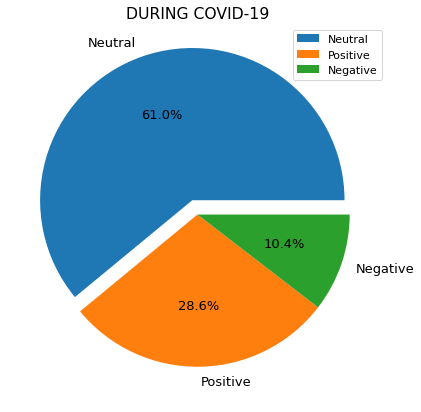

In [ ]:
vader_counts= mydata['Vader_Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.rcParams['font.size'] = '13'
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
plt.title("DURING COVID-19")
plt.legend(fontsize = 11)

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

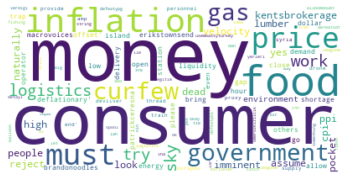

In [ ]:
def create_wordcloud(text):
  wc = WordCloud(background_color = 'white', max_words=3000, repeat=False)
  wc.generate(str(text))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.show()
create_wordcloud(mydata['Lemmatized_sent'].values)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer()
countVector = countVectorizer.fit_transform(mydata['Lemmatized_sent'])
print('{} Number of tweets have {} words'.format(countVector.shape[0], countVector.shape[1]))


count_vect_df = pd.DataFrame(countVector.toarray(), columns = countVectorizer.get_feature_names())
count_vect_df

4244 Number of tweets have 15620 words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaaaarghhhhhh,aabb,aaj,aam,aande,aap,aapnewswire,aar,...,zombieritual,zone,zones,zoology,zooted,zrori,ztweetera,zubymusic,zurunakurupark,zvdfvdv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
counts = pd.DataFrame(count_vect_df.sum())
count_df = counts.sort_values(0, ascending = False).head(20)
count_df

,0
food,1481
medicine,1271
consumer,1242
freight,1079
logistics,803
amp,518
logisticsmanagement,462
like,394
train,369
good,291


Text(0.5, 1.0, '20 Most frequently used words - During covid')

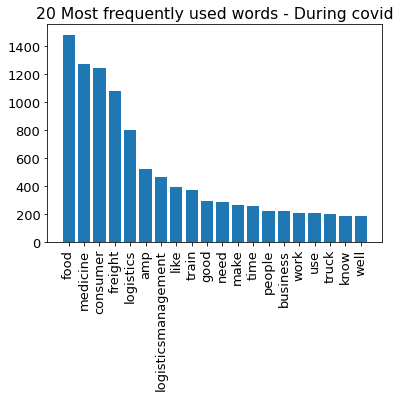

In [ ]:
ind = count_df.index
val = [item for sublist in count_df.values for item in sublist]
plt.bar(ind, val)
plt.xticks(rotation=90)
plt.title('20 Most frequently used words - During covid')

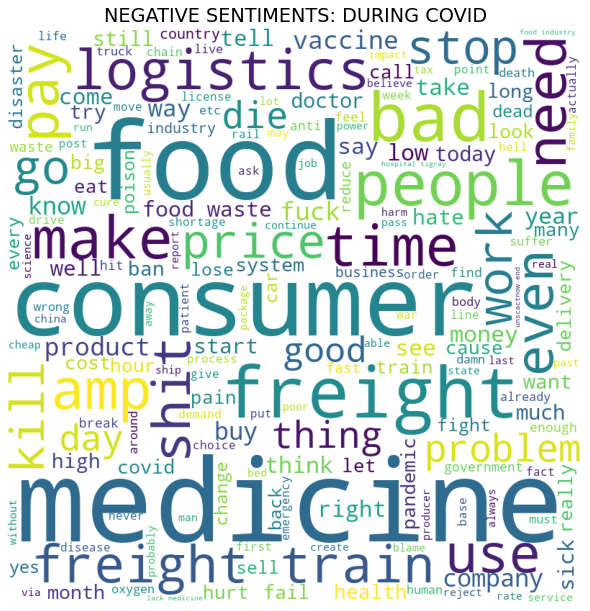

In [ ]:
word_cloud_df = mydata.loc[mydata['Vader_Analysis'] == 'Negative', :]
all_words = ' '.join([text for text in word_cloud_df['Lemmatized_sent']])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.rcParams['font.size'] = '16'
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('NEGATIVE SENTIMENTS: DURING COVID')
plt.show()

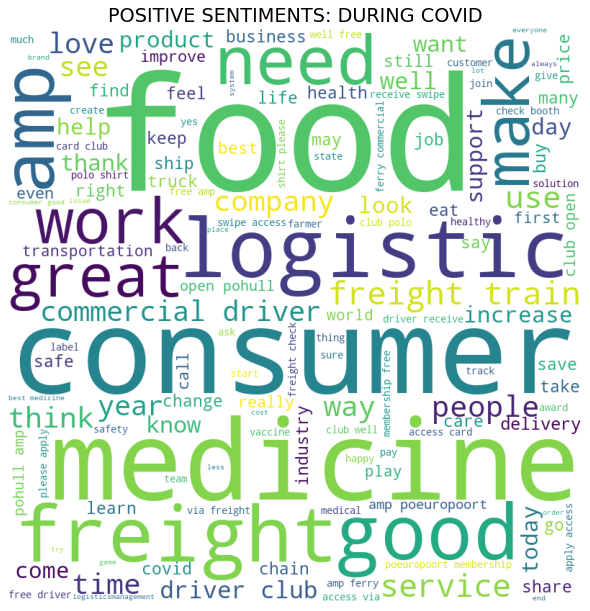

In [ ]:
word_cloud_df1 = mydata.loc[mydata['Vader_Analysis'] == 'Positive', :]
all_words = ' '.join([text for text in word_cloud_df1['Lemmatized_sent']])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.rcParams['font.size'] = '16'
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('POSITIVE SENTIMENTS: DURING COVID')
plt.show()

In [ ]:
from nltk.util import ngrams
#tokens = mydata['Lemmatized_sent'].str.split()
#sequences = [tokens[i:] for i in range(3)]
#bigrams = zip(*sequences)
n_grams = ngrams(mydata['Lemmatized_sent'].str.split(), 3)
for grams in n_grams:
    print(grams)

#output = list(ngrams(mydata['Lemmatized_sent'], 5))
#print(output)

(['kentsbrokerage', 'people', 'look', 'naturally', 'assume', 'inflation', 'imminent', 'velocity', 'money', 'dead', 'ppi', 'cpi', 'consumer', 'reject', 'high', 'price', 'yes', 'pocket', 'inflation', 'lumber', 'food', 'environment', 'deflationary'], ['brandonoodles', 'macrovoices', 'erikstownsend', 'patrickceresna', 'dollar', 'shortage', 'bring', 'liquidity', 'trap', 'gap', 'demand', 'money', 'money', 'must', 'close', 'low', 'consumer', 'price', 'go', 'food', 'energy', 'others', 'must', 'even', 'offset'], ['government', 'island', 'curfew', 'also', 'government', 'gas', 'station', 'operator', 'please', 'open', 'curfew', 'hour', 'allow', 'delivery', 'personnel', 'gas', 'devliver', 'food', 'consumer', 'end'])
(['brandonoodles', 'macrovoices', 'erikstownsend', 'patrickceresna', 'dollar', 'shortage', 'bring', 'liquidity', 'trap', 'gap', 'demand', 'money', 'money', 'must', 'close', 'low', 'consumer', 'price', 'go', 'food', 'energy', 'others', 'must', 'even', 'offset'], ['government', 'island', 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(mydata.Lemmatized_sent).toarray()
y = mydata.Vader_Analysis.map({'Positive': 1, 'Neutral': 0, 'Negative':-1}).values
featureNames = tfidf.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((3395, 2500), (849, 2500))

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

## Testing the model on test set
y_pred = classifier.predict(X_test)
y_pred

array([ 1,  0,  1,  1, -1,  1,  1,  1,  0,  1,  0, -1,  1,  0,  1,  1, -1,
        0,  1, -1,  1,  1,  1,  0,  0, -1,  1, -1, -1,  1,  0,  1,  0,  0,
        1,  1,  0,  0,  0, -1,  1,  1,  0,  0,  1, -1,  0,  0, -1, -1,  1,
       -1,  1,  0,  1,  1,  0, -1,  1,  1,  0,  1, -1,  0,  0,  1,  1,  1,
        1,  1,  0,  0,  1, -1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  1, -1,
        0, -1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  1, -1,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  1,  1,  1, -1,  1,  0,  1,  1,  0,
        0,  1,  0,  0,  0, -1,  1,  1,  0, -1,  0, -1,  0,  1, -1,  0,  0,
        1, -1,  1,  0,  0, -1,  0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  0,
        0,  0,  1,  1,  0,  0, -1,  0,  0,  1,  0,  1,  1, -1,  1,  0,  0,
        0,  1,  0,  0, -1,  0,  1,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,
       -1,  1,  0, -1,  1,  1, -1,  1,  1,  0,  0,  0,  0, -1,  1,  0, -1,
        1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1, -1,  0,  1,  1,
        0,  1,  0,  0,  0

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[ 23  39  21]
 [106 201 204]
 [ 24  77 154]]
The model accuracy is 0.4452296819787986


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 15)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7067137809187279

In [ ]:
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

#plt.bar([x for x in range(len(featureImportance))], featureImportance)
#plt.show()

,Importance,word
25,0.087587,free
9,0.077005,best
33,0.057066,great
7,0.051273,bad
32,0.050464,good
...,...,...
47,0.002353,logisticsmanagementsoftware
8,0.002195,hard
42,0.001756,learn
72,0.001647,say
